# seaborn_diamonds_machine_learning_vs_deep_learning

In this code example, a dataset is preprocessed, modelled, and then the models are contrasted. We'll focus on the seaborn library's diamonds dataset specifically. The qualities and pricing of diamonds are included in this dataset. Our objective is to forecast diamond prices using various deep learning and machine learning methods.

The dataset must first be imported and investigated. In this stage, we examine the dataset's dimensions, statistics, and missing values. It also enables us to distinguish between qualities that are categorical and those that are numerical.

Next, we draw the histograms of the numerical variables to observe the variable distributions. This aids in our comprehension of the data's fundamental structure.

We may clear up abnormalities from our dataset by using the phase of outlier detection and removal. The Local Outlier Factor (LOF) algorithm is used for this.

The category characteristics are then one-hot encoded into numeric format. This stage enables categorical data to be understood by machine learning and deep learning algorithms.

Scaling features is the following stage. This guarantees that all features have the same scale and is accomplished using StandardScaler.

Next, training and test sets are created from the data collection. This enables us to assess the model's performance using fresh data.

Next, predictions are produced using a deep learning model created with the TensorFlow library and a linear regression model trained using the Scikit-Learn library.

Finally, we evaluate the effectiveness of the two models. To do this, we compute the mean square error (MSE) for each model and graph the results. This aids in identifying the model that outperforms the test set.

The steps of a whole data science project are demonstrated by this method. It should be emphasized, nevertheless, that because every dataset is different, each dataset can need its own unique set of data pretreatment methods.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# 1. Data Loading
df = sns.load_dataset('diamonds')

# Data Discovery

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
print('Dimensions of the dataset:',df.shape)

Dimensions of the dataset: (53940, 10)


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

there are no NAN values in this dataset

# Histograms for numeric variables

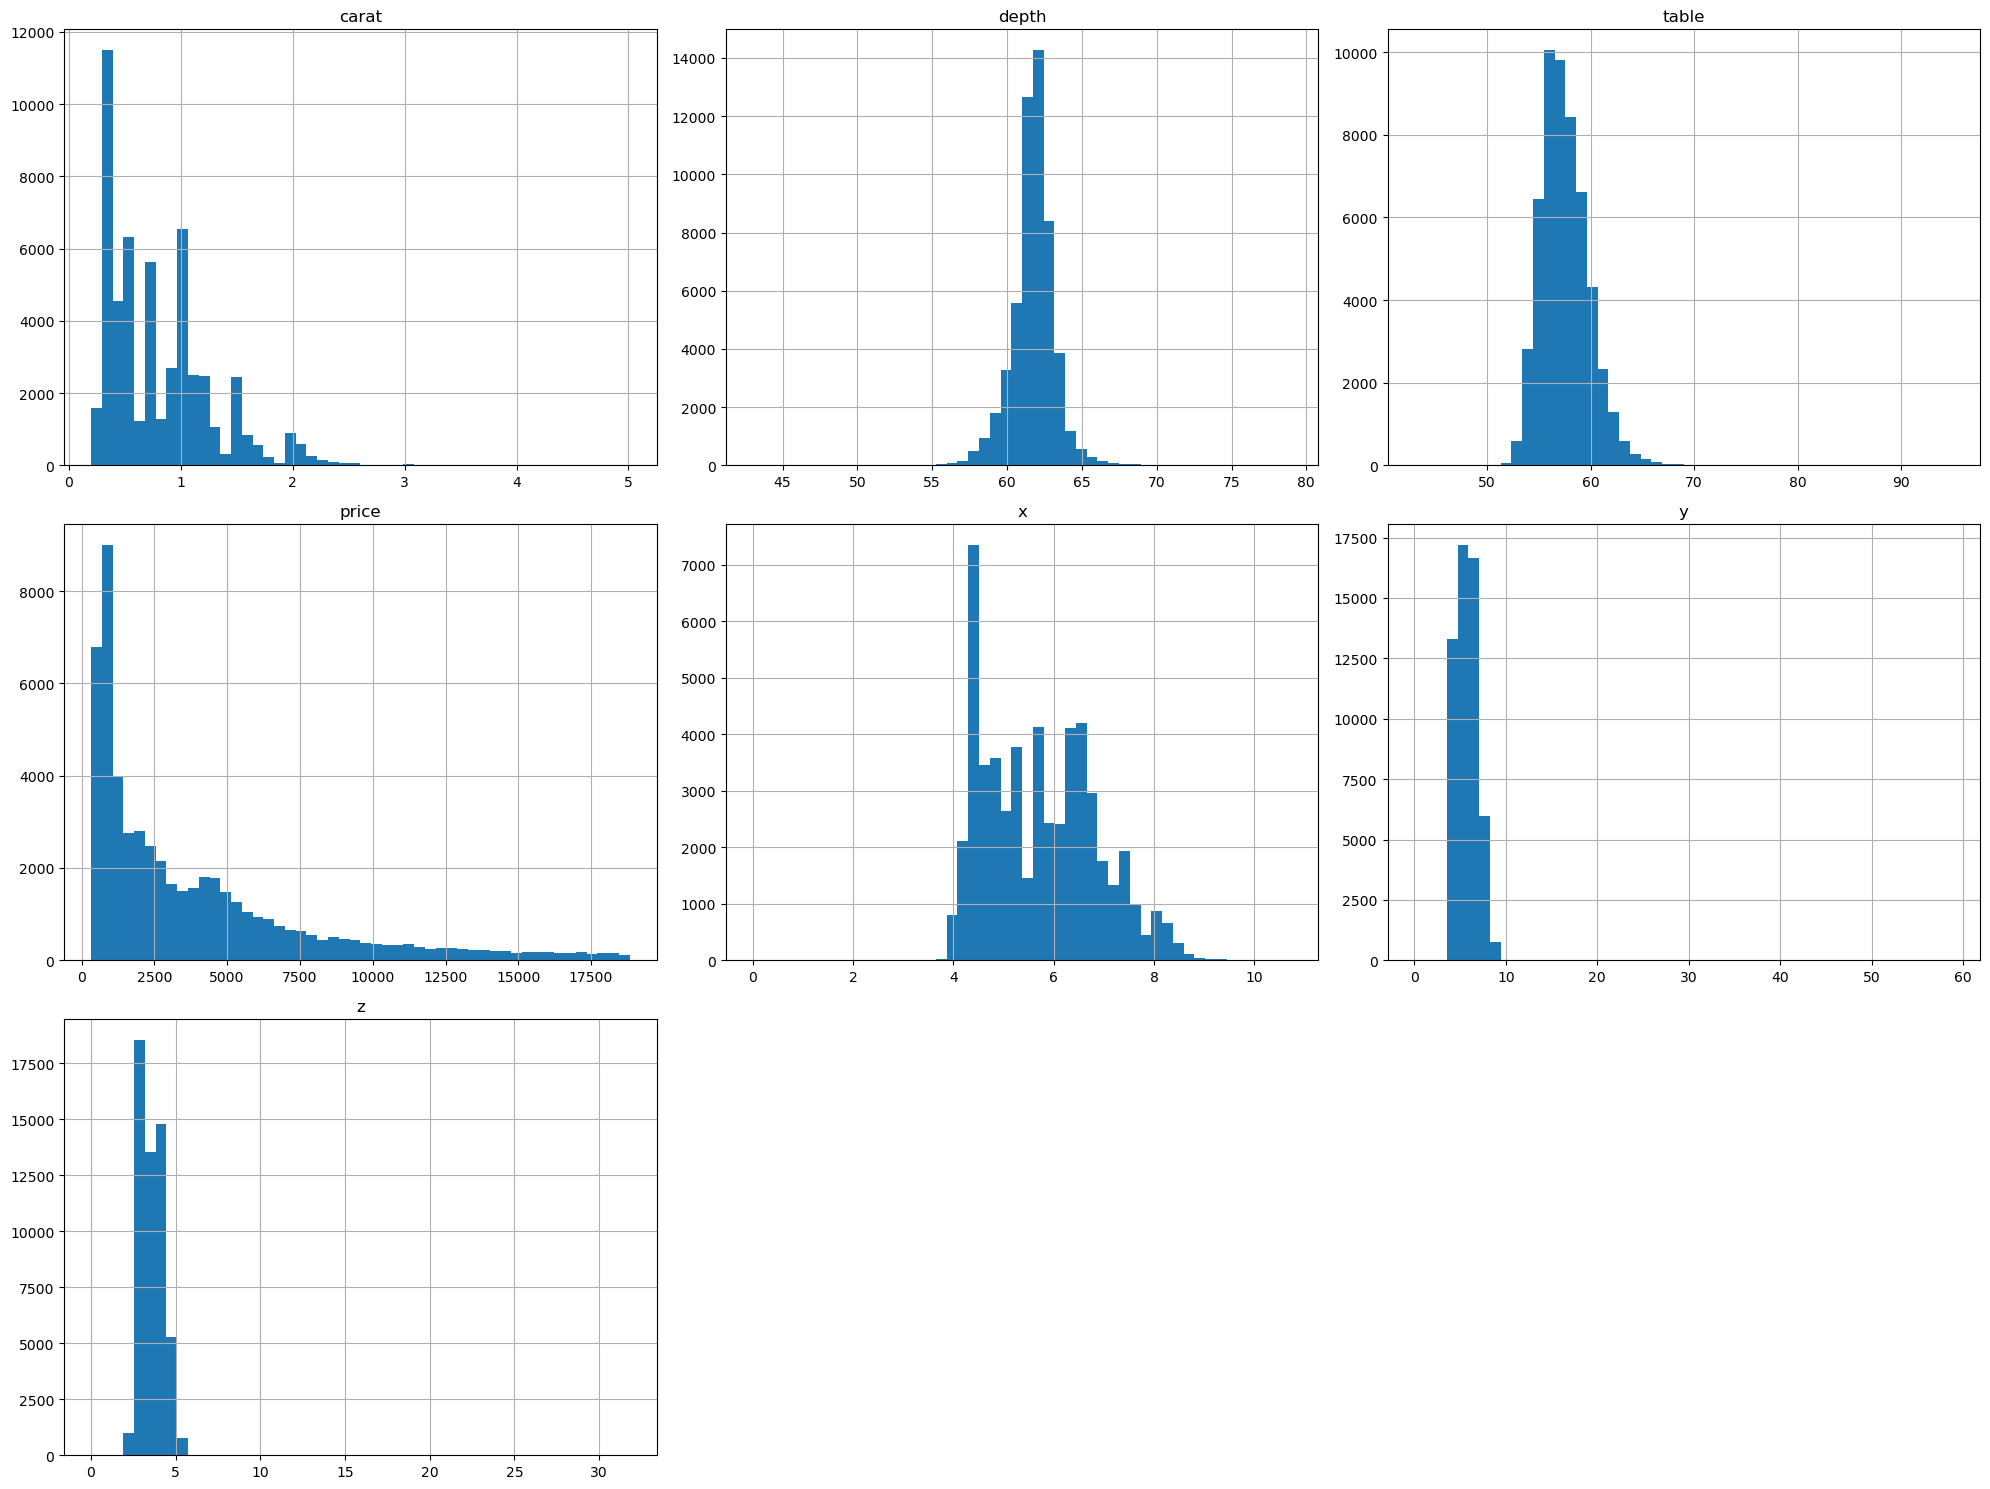

In [9]:
df.select_dtypes(include=['float64', 'int64']).hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

# Correlation Matrix


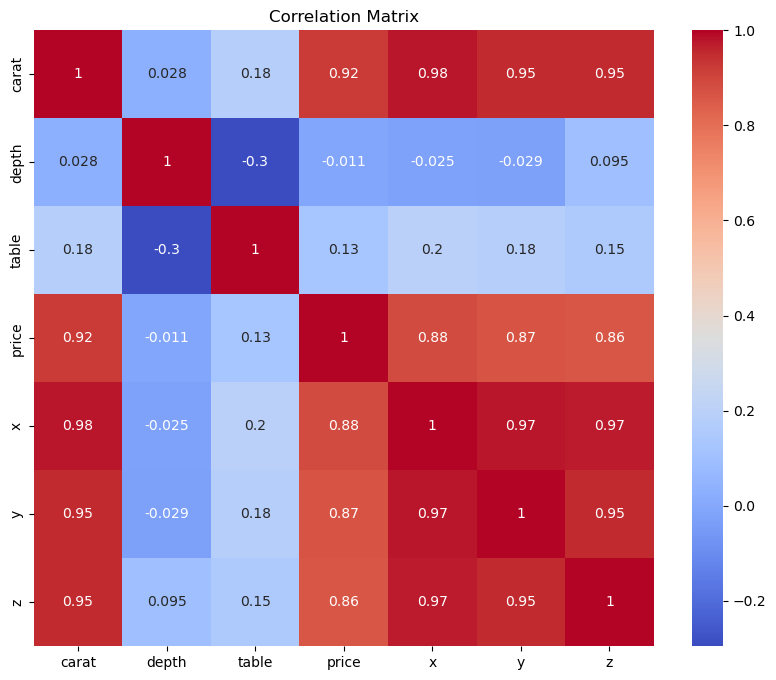

In [11]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

visualizes correlations between features in the dataset as a heatmap.visualizes correlations between features in the dataset as a heatmap.

# Box Chart: Cut vs Price

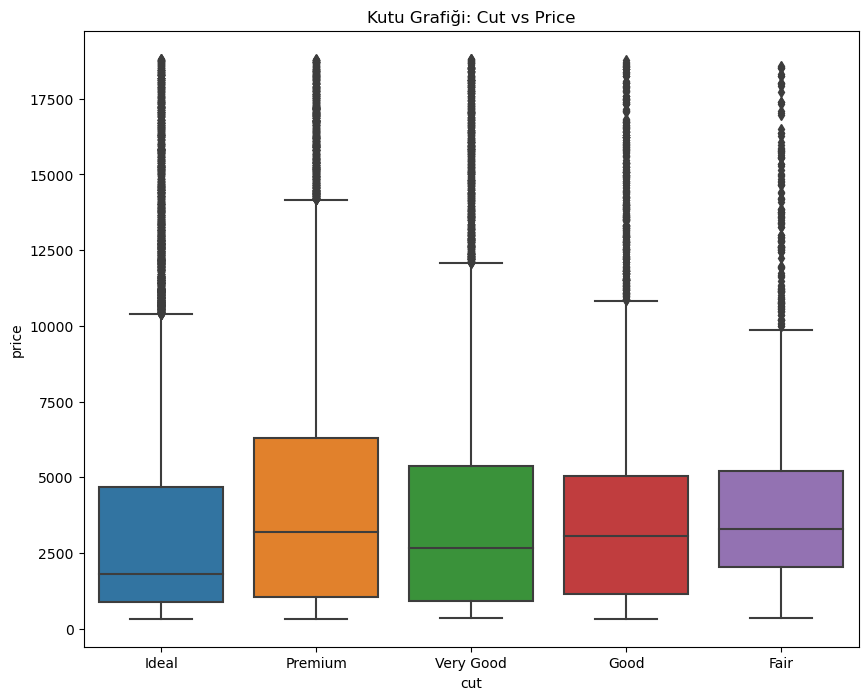

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='cut', y='price')
plt.title('Box Chart : Cut vs Price')
plt.show()

This Cod line creates a boxplot of the 'price' property relative to the 'cut' property.

# Violin Chart: Cut vs Price

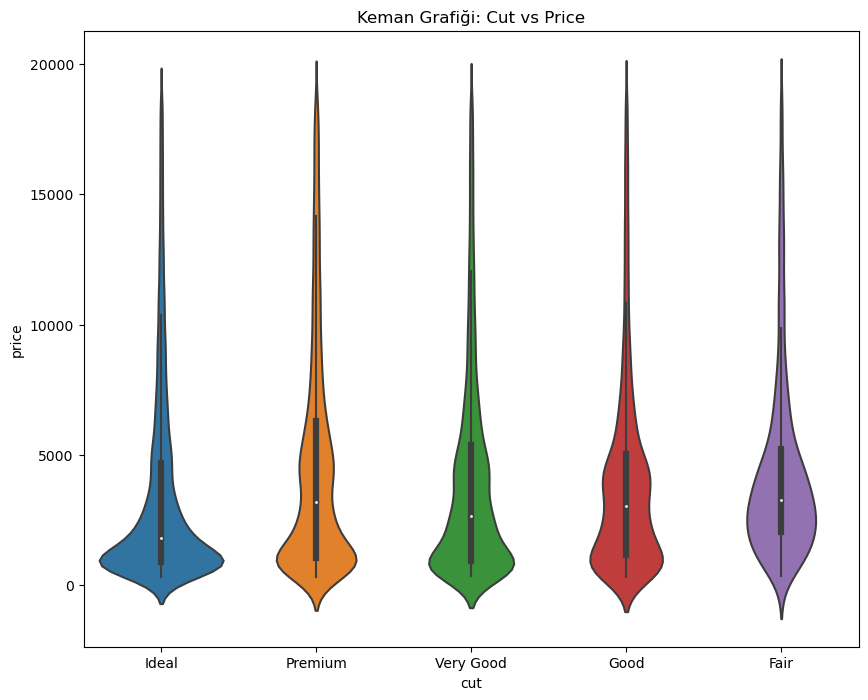

In [13]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='cut', y='price')
plt.title('Violin Chart: Cut vs Price')
plt.show()

Creates a Violin plot of the 'price' property based on the 'cut' property.

# Outliers

In [14]:
lof = LocalOutlierFactor()
outliers = lof.fit_predict(df.select_dtypes(include=['float64', 'int64']))
df = df[outliers == 1]

# Categorical Values

In [15]:
df = pd.get_dummies(df, drop_first=True)

# Scaling

In [16]:
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

# Separating Dataset as Train/Test

In [17]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning vs Deep Learning

I will create and train a machine learning model and a deep learning model. In this example, I will create a Linear Regression model using the Scikit-Learn library and a simple Deep Learning model using the TensorFlow library. Then I will visualize the performance of these models.

Lineer Regresyon MSE:  0.07646645069848367


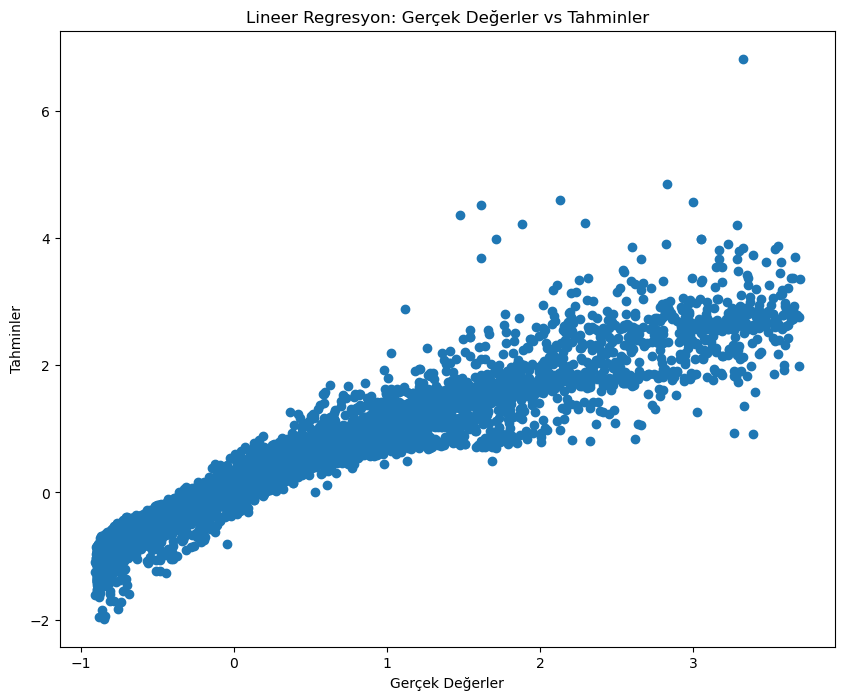

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Build and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# getting predictions
lr_predictions = lr_model.predict(X_test)

# Calculate the error metric
lr_mse = mean_squared_error(y_test, lr_predictions)
print('Linear Regression MSE: ', lr_mse)

# Let's visualize forecasts with real values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, lr_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: Actual Values vs. Estimates')
plt.show()

This code creates a Linear Regression model, trains it, takes its estimates from the test set, calculates the MSE error metric, and visualizes the relationship between actual values ​​and predictions with a scatter plot.

Epoch 1/50
1317/1317 [==============================] - 3s 2ms/step - loss: 0.0570 - val_loss: 0.0305
Epoch 2/50
1317/1317 [==============================] - 2s 2ms/step - loss: 0.0288 - val_loss: 0.0264
Epoch 3/50
1317/1317 [==============================] - 2s 2ms/step - loss: 0.0258 - val_loss: 0.0270
Epoch 4/50
1317/1317 [==============================] - 2s 2ms/step - loss: 0.0245 - val_loss: 0.0240
Epoch 5/50
1317/1317 [==============================] - 3s 2ms/step - loss: 0.0232 - val_loss: 0.0233
Epoch 6/50
1317/1317 [==============================] - 3s 2ms/step - loss: 0.0220 - val_loss: 0.0263
Epoch 7/50
1317/1317 [==============================] - 2s 2ms/step - loss: 0.0217 - val_loss: 0.0224
Epoch 8/50
1317/1317 [==============================] - 2s 2ms/step - loss: 0.0211 - val_loss: 0.0229
Epoch 9/50
1317/1317 [==============================] - 2s 2ms/step - loss: 0.0210 - val_loss: 0.0230
Epoch 10/50
1317/1317 [==============================] - 2s 2ms/step - loss: 0.020

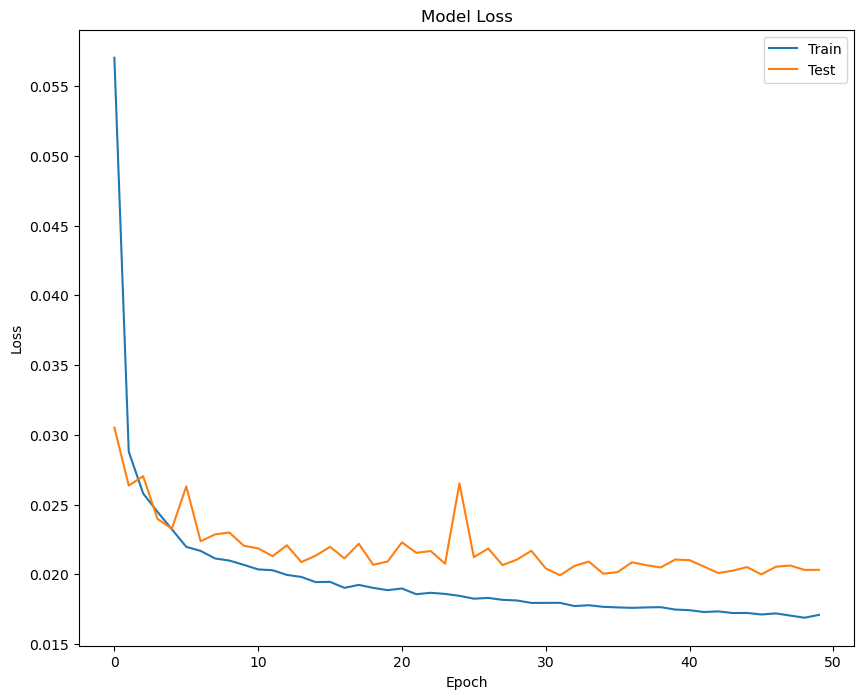

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
dl_model = Sequential()
dl_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dense(1))

# compile model
dl_model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = dl_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# get predictions
dl_predictions = dl_model.predict(X_test)

# Calculate the error metric
dl_mse = mean_squared_error(y_test, dl_predictions)
print('Deep Learning MSE: ', dl_mse)

# Let's visualize the loss of training and validation
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Linear Regression MSE:  0.07646645069848367


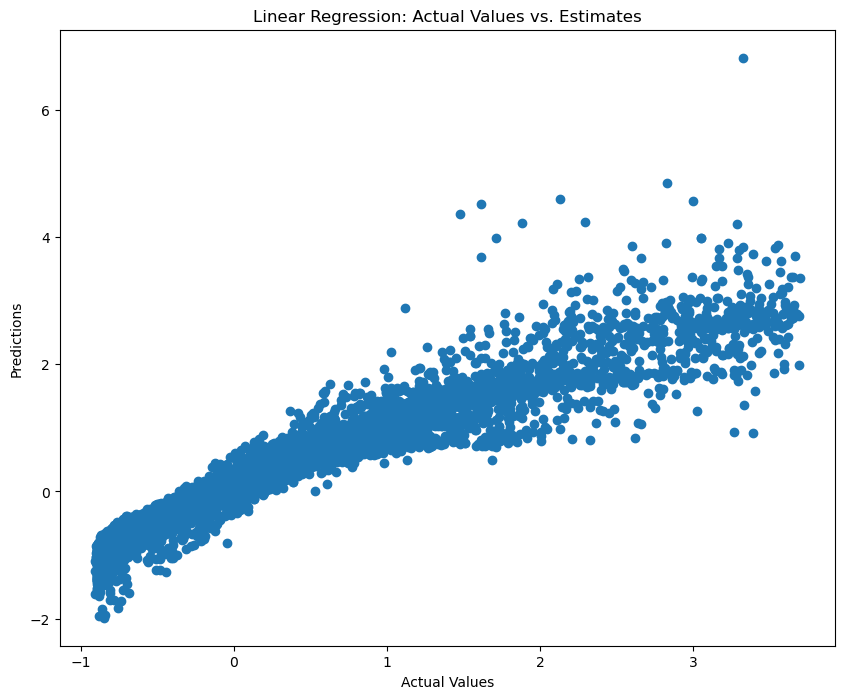

Deep Learning MSE:  0.020327509569225327


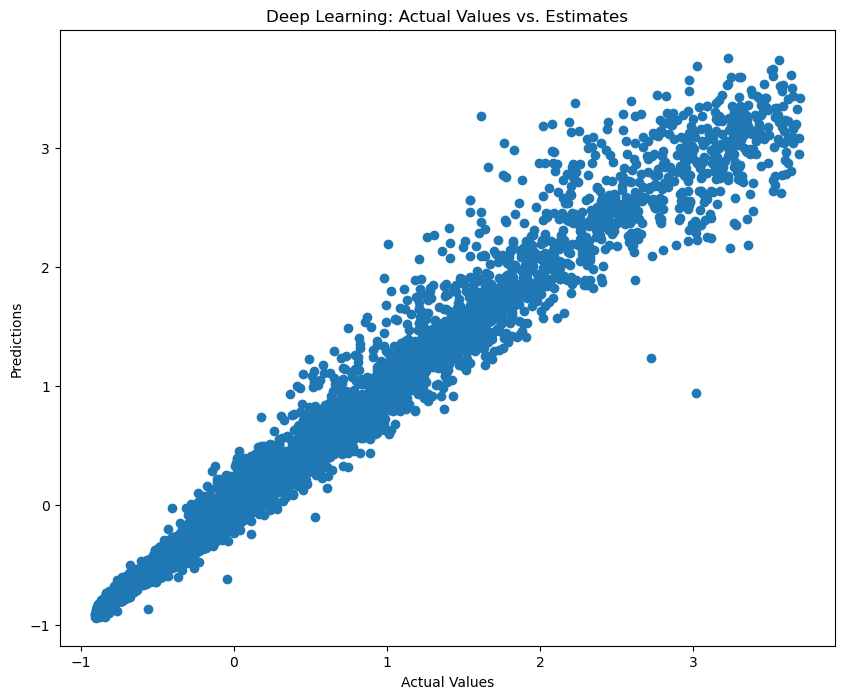

In [20]:
# MSE and Estimates for Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)
print('Linear Regression MSE: ', lr_mse)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, lr_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: Actual Values vs. Estimates')
plt.show()

# MSE and Predictions for Deep Learning
dl_mse = mean_squared_error(y_test, dl_predictions)
print('Deep Learning MSE: ', dl_mse)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, dl_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Deep Learning: Actual Values vs. Estimates')
plt.show()

These bits of code display the predictions and mistakes made by the Deep Learning model as well as the Linear Regression model. We can determine which model fared better on the test set by comparing the MSE values of the two models.

The link between actual values and estimates is displayed using scatter plots. The ideal situation would be for the forecasts to coincide exactly with the measured data. This demonstrates how well the model predicts the future. However, estimations vary widely and this level of perfection is very unusual. We may assess the accuracy of the forecasts by examining the scatter plots' overall form.

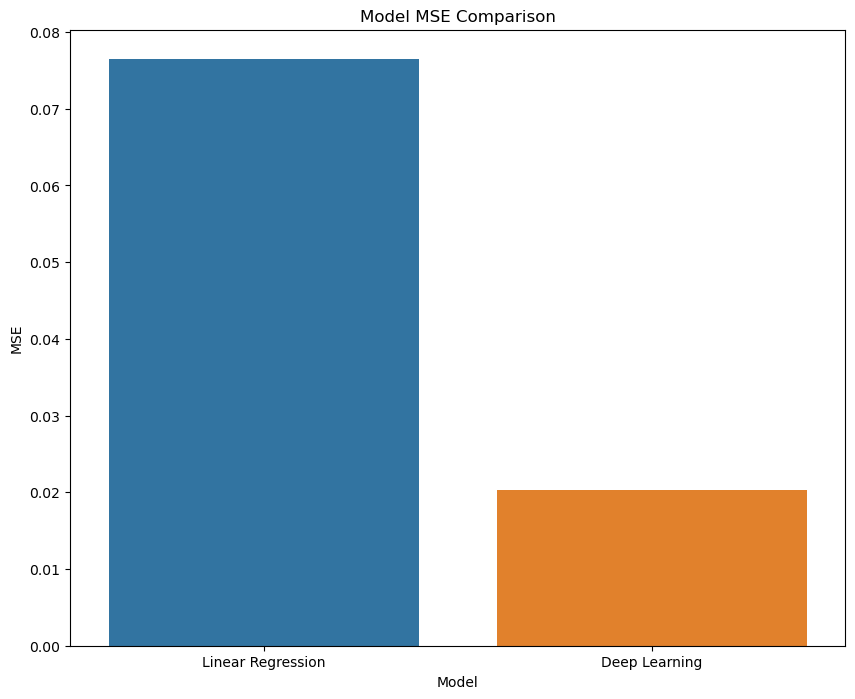

In [22]:
# Let's enclose the MSE values in a DataFrame
mse_values = pd.DataFrame({'Model': ['Linear Regression', 'Deep Learning'], 'MSE': [lr_mse, dl_mse]})

# Let's show MSE values in a graph
plt.figure(figsize=(10, 8))
sns.barplot(x='Model', y='MSE', data=mse_values)
plt.title('Model MSE Comparison')
plt.show()

# What We Did in This Notebook

We applied a series of data preprocessing steps on the diamond dataset. These steps included loading the dataset, checking for missing data, removing outliers, one-hot encoding categorical features, and scaling the features.

Then, we created and trained two different models: a Linear Regression model and a Deep Learning model. Both models were trained to predict the 'price' target variable. We visualized the model predictions and errors, and compared the performance of both models using the Mean Squared Error (MSE) error metric.

By looking at the scatter plots of the Linear Regression and Deep Learning models, we can see that the predictions generally align quite well with the actual values. However, there are some differences present as well. In an ideal scenario, the predictions would form a perfect straight line with the actual values. However, such perfection is rarely observed, and the predictions tend to scatter a bit. Scatter plots illustrate this scatter and how good the predictions are.

When comparing the MSE error metrics using a bar plot, we can observe that both models exhibit a similar level of error. However, it's important to note that since MSE is an error metric, a lower MSE value generally indicates better model performance. This graph shows which model made predictions with lower error on the test set.

In conclusion, both models displayed acceptable performance, but each has its advantages and disadvantages. The Linear Regression model is simpler and faster to train, while the Deep Learning model can often learn more complex relationships. When deciding which model to use, these factors should be taken into consideration. The crucial aspect in model selection is choosing the model that can best solve the business problem at hand.